In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("Data_tokenized.csv")
df.head()

,topic,tokens
0,Pháp luật,tên cướp tiệm vàng huế đại_úy công_an công_tác...
1,Sức khỏe - Đời sống,bỏ mạng 5 g nga tiến thẳng 4 g 6 g gần đây thứ...
2,Giáo dục,địa_phương đứng đầu tổng 3 môn văn_toán ngoại_...
3,Thế giới,người chết mưa_lũ nghìn một mỹ 28 thống_đốc ke...
4,Thời sự,hải_phòng hình_ảnh xe điên tai_nạn liên_hoàn p...


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161216 entries, 0 to 161215
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   topic   161216 non-null  object
 1   tokens  161216 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [22]:
df["topic"].value_counts()

topic
Sức khỏe - Đời sống       23241
Văn hóa - Giải trí        21224
Thể thao                  19263
Thế giới                  16682
Xã hội                    15580
Thời sự                   15205
Pháp luật                 10650
Kinh doanh - Tài chính    10313
Giáo dục                   7631
Kinh tế                    5255
Công nghệ                  4248
Chính trị                  4032
Xe                         3795
Bạn đọc                    1715
Bất động sản               1457
Quốc phòng                  925
Name: count, dtype: int64

In [23]:
merge = {
    "Quốc phòng":"Chính trị",
    "Bất động sản":"Kinh tế",
    "Bạn đọc":"Xã hội"
}
df["topic"] = df["topic"].replace(merge)
df["topic"].value_counts()

topic
Sức khỏe - Đời sống       23241
Văn hóa - Giải trí        21224
Thể thao                  19263
Xã hội                    17295
Thế giới                  16682
Thời sự                   15205
Pháp luật                 10650
Kinh doanh - Tài chính    10313
Giáo dục                   7631
Kinh tế                    6712
Chính trị                  4957
Công nghệ                  4248
Xe                         3795
Name: count, dtype: int64

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
tokenizer = Tokenizer(num_words=30000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["tokens"])
tokenizer.index_word

{1: '<OOV>',
 2: 'công',
 3: 'thể',
 4: 'đồng',
 5: 'hiện',
 6: 'đầu',
 7: 'nam',
 8: 'thành',
 9: 'động',
 10: 'định',
 11: 'quan',
 12: 'gia',
 13: 'nhân',
 14: 'giá',
 15: 'thời',
 16: 'quốc',
 17: 'việt',
 18: 'trường',
 19: 'hàng',
 20: 'thông',
 21: 'hợp',
 22: 'phát',
 23: '2',
 24: '1',
 25: 'trung',
 26: 'học',
 27: 'sinh',
 28: 'đó',
 29: 'thực',
 30: 'đối',
 31: 'hành',
 32: 'hội',
 33: 'tế',
 34: 'viên',
 35: '7',
 36: 'vụ',
 37: 'dân',
 38: 'dụng',
 39: 'lý',
 40: 'đi',
 41: 'tiếp',
 42: 'chủ',
 43: 'an',
 44: 'hình',
 45: 'cầu',
 46: 'kết',
 47: '6',
 48: '3',
 49: 'trình',
 50: 'sản',
 51: 'dự',
 52: 'thủ',
 53: 'chức',
 54: 'xuất',
 55: 'xe',
 56: 'thi',
 57: 'năng',
 58: 'báo',
 59: 'thị',
 60: 'tiền',
 61: 'bệnh',
 62: 'giải',
 63: 'theo',
 64: 'nghiệp',
 65: 'tình',
 66: 'lực',
 67: 'đại',
 68: 'tác',
 69: 'độ',
 70: 'phòng',
 71: 'bộ',
 72: 'nội',
 73: 'bình',
 74: 'tài',
 75: 'tư',
 76: '5',
 77: 'bảo',
 78: 'liên',
 79: 'phương',
 80: 'văn',
 81: 'đề',
 82: 'đường

In [26]:
sequences = tokenizer.texts_to_sequences(df["tokens"])
df["tokens"] = sequences

In [29]:
df.head()

,topic,tokens
0,Pháp luật,"[1711, 1569, 1829, 381, 1201, 67, 2506, 2, 43,..."
1,Sức khỏe - Đời sống,"[2008, 292, 76, 1285, 146, 249, 797, 98, 1285,..."
2,Giáo dục,"[127, 79, 516, 6, 122, 48, 388, 80, 452, 337, ..."
3,Thế giới,"[204, 809, 459, 1628, 986, 311, 130, 828, 124,..."
4,Thời sự,"[243, 70, 44, 118, 55, 2756, 647, 403, 78, 165..."


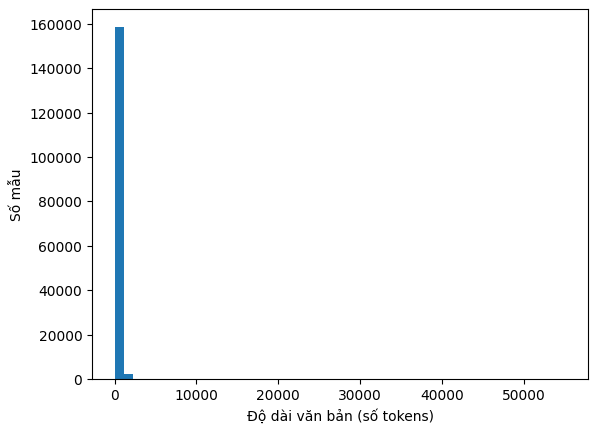

Trung bình: 402.94577461294165
Median: 344.0
90% số văn bản <=  710.0
95% số văn bản <=  853.0


In [39]:
import matplotlib.pyplot as plt
import numpy as np
lengths = [len(seq) for seq in df["tokens"]]

plt.hist(lengths, bins=50)
plt.xlabel("Độ dài văn bản (số tokens)")
plt.ylabel("Số mẫu")
plt.show()

print("Trung bình:", np.mean(lengths))
print("Median:", np.median(lengths))
print("90% số văn bản <= ", np.percentile(lengths, 90))
print("95% số văn bản <= ", np.percentile(lengths, 95))


In [ ]:
padding = pad_sequences(df["tokens"],maxlen=853,padding="post",truncating="post")

In [41]:
X = padding
print(X.shape)

(161216, 853)


In [45]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y = le.fit_transform(df["topic"])
y = to_categorical(y)

print(y[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPool1D, Dense, Dropout, BatchNormalization

In [ ]:
model_cnn = Sequential(
    Embedding(input_dim=30001,output_dim=)
)

Init signature:
Embedding(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    weights=None,
    lora_rank=None,
    lora_alpha=None,
    **kwargs,
)
Docstring:     
Turns nonnegative integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used on nonnegative integer inputs of a fixed range.

Example:

>>> model = keras.Sequential()
>>> model.add(keras.layers.Embedding(1000, 64))
>>> # The model will take as input an integer matrix of size (batch,
>>> # input_length), and the largest integer (i.e. word index) in the input
>>> # should be no larger than 999 (vocabulary size).
>>> # Now model.output_shape is (None, 10, 64), where `None` is the batch
>>> # dimension.
>>> input_array = np.random.randint(1000, size=(32, 10))
>>> model.compile('rmsprop', 'mse')
>>> output_array = model.predict(input_array)
>>> print(

80.001